In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

In [3]:
L = 1.
nt = 100
nx = 51.
alpha = 1.22e-3
q=0
dx = L/(nx-1)
qdx = q*dx
Ti = numpy.zeros(nx)
Ti[0] = 100

/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [4]:
from scipy.linalg import solve

In [5]:
def generateMatrix(N, sigma):
    d = numpy.diag(numpy.ones(N-2)*(2+1./sigma))
    d[-1,-1] = 1+ 1./sigma
    ud = numpy.diag(numpy.ones(N-3)*-1,1)
    ld = numpy.diag(numpy.ones(N-3)*-1,-1)
    
    A = d+ud+ld
    return A

In [6]:
def generateRHS(T, sigma, qdx):
    b = numpy.zeros_like(T)
    b = T[1:-1]*1./sigma
    b[0] += T[0]
    b[-2] += qdx
    return b

In [9]:
def implicit_ftcs(T, A, nt, sigma, qdx):
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(Tn, sigma, qdx)
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        T[-1] = T[-2] +qdx
    return T

In [10]:
sigma = 0.5
dt = sigma*dx*dx/alpha
nt = 1000
A = generateMatrix(nx,sigma)

In [15]:
print (A)

[[ 4. -1.  0. ...,  0.  0.  0.]
 [-1.  4. -1. ...,  0.  0.  0.]
 [ 0. -1.  4. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  4. -1.  0.]
 [ 0.  0.  0. ..., -1.  4. -1.]
 [ 0.  0.  0. ...,  0. -1.  3.]]


In [16]:
T = implicit_ftcs(Ti.copy(),A,nt,sigma,qdx)

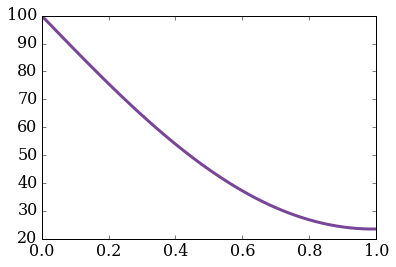

In [17]:
pyplot.plot(numpy.linspace(0,1,nx),T,color='#784598', ls='-', lw=3)

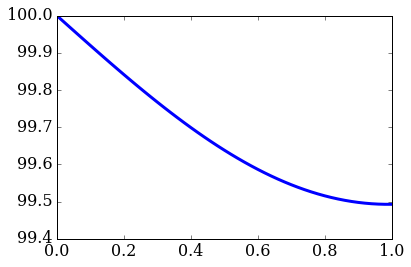

In [18]:
sigma = 5.0
A = generateMatrix(nx, sigma)
T = implicit_ftcs(T.copy(), A, nt, sigma, qdx)
pyplot.plot(numpy.linspace(0,1,nx), T, ls = '-', lw=3)